# Gradient Descent for Linear Regression

In this notebook, we will implement **Gradient Descent** to fit a linear regression model to a given dataset. The objective is to determine the optimal parameters $m$ (slope) and $b$ (intercept) for the line $(y = mx + b)$ by minimizing the **Mean Squared Error (MSE)**. Gradient descent will be used as an optimization technique to iteratively adjust the model parameters and find the line that best fits the data.

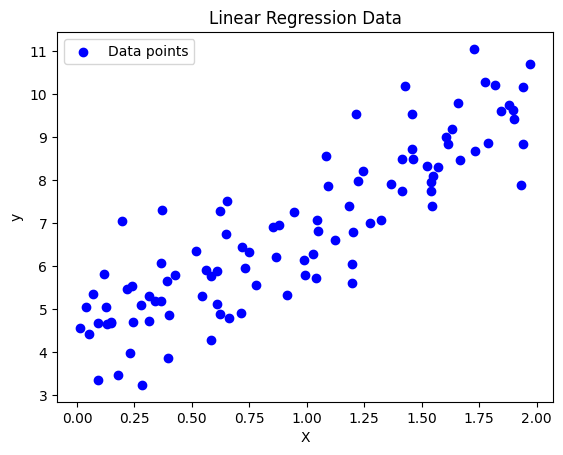

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data points for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Visualize the data
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Data')
plt.legend()
plt.show()

#### Define the Cost Function (MSE) and Gradient

We want to minimize the MSE cost function:

$$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y})^2$$

Where $N$ is the number of data points, $y_i$ are the target values, and $\hat{y}$ represents the predicted value of the model. By substituting $\hat{y}$ with the linear model expression $mx_i + b$, where $x_i$ are the features we get:

$$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + b))^2$$

The gradients of MSE with respect to $m$ and $b$ are:

$$\frac{\partial MSE}{\partial m} = -\frac{2}{N} \sum_{i=1}^{N} x_i(y_i - (mx_i + b))$$

$$\frac{\partial MSE}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - (mx_i + b))$$

##### **compute_cost function** – Calculate the Mean Squared Error (MSE)

1. **Predictions**: First, we compute the predicted values $\hat{y}$ using the linear model equation $\hat{y} = X \cdot \theta$, where $X$ is the feature matrix and $\theta$ is the model's parameters (weights).
2. **Cost Calculation**: Then, the cost (error) is calculated by averaging the squared differences between the predicted values and the true target values.

In [2]:
def compute_cost(theta, X, y):
    predictions = X.dot(theta)
    cost = (1 / len(X)) * np.sum((predictions - y) ** 2)
    return cost

##### **compute_gradient function** – Calculate the gradient of the cost function

  1. **Error**: First, we compute the error (or difference) between the predicted values and the actual target values: $X \cdot \theta - y$.
  2. **Gradient Calculation**: The gradient is computed by multiplying the error by the feature matrix $X$ and then averaging over all data points. This tells us how much the parameters need to change to reduce the error.

  The formula for the gradient is:

  $$
  \nabla_{\theta} = \frac{2}{N} X^T (X \cdot \theta - y)
  $$

  where $X^T$ is the transpose of the feature matrix $X$, and $(X \cdot \theta - y)$ is the error.

In [3]:
def compute_gradient(theta, X, y):
    error = X.dot(theta) - y
    gradients = (2 / len(X)) * X.T.dot(error)
    return gradients


#### Gradient Descent Algorithm

Now let's implement the gradient descent algorithm to optimize $m$ and $b$.


In [4]:
# Gradient descent parameters
learning_rate = 0.1
iterations = 1000
theta_init = np.random.randn(2, 1)  # Initial guess for m and b
tolerance = 1e-6

# Perform gradient descent
theta = theta_init
cost_history = []
iterations_done = 0

# Add a bias column (ones) to X, forming X with bias term (X_b).
X_b = np.c_[np.ones((X.shape[0], 1)), X]

for i in range(iterations):
    gradients = compute_gradient(theta, X_b, y)
    theta = theta - learning_rate * gradients  # Update parameters
    cost = compute_cost(theta, X_b, y)
    cost_history.append(cost)

    iterations_done += 1

    # Stopping condition
    if i > 0 and np.abs(cost_history[-1] - cost_history[-2]) < tolerance: # The (i > 0) ensures that there is at least one previous cost value in cost_history
        print(f"Stopping early due to small change in cost.")
        break

# Optimal parameters
optimal_theta = theta
print(f"Optimal parameters (m, b): {optimal_theta.flatten()}")
print(f"Final cost: {cost_history[-1]}")

Stopping early due to small change in cost.
Optimal parameters (m, b): [4.20851977 2.77591998]
Final cost: 0.8065976258942447



#### Visualize the Convergence

We can visualize how the cost function converges over iterations.


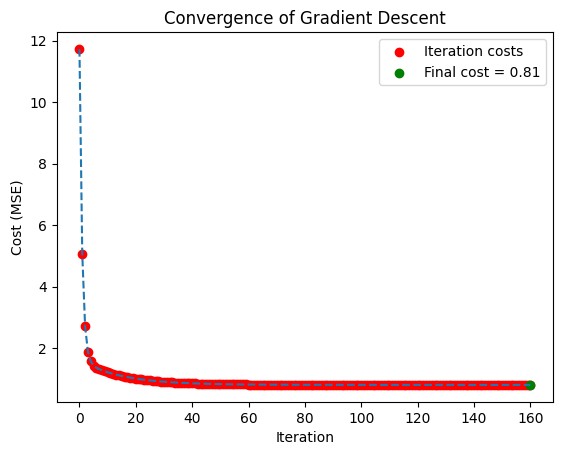

In [5]:
plt.plot(cost_history, linestyle='dashed')

plt.scatter(range(iterations_done), cost_history, color='red', label='Iteration costs')

final_cost = round(cost_history[-1], 2)
plt.scatter(iterations_done - 1, cost_history[-1], color='green', label=f'Final cost = {final_cost}')

plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Convergence of Gradient Descent')

plt.legend()
plt.show()


#### Plot the Best-Fit Line

Finally, we will plot the best-fit line based on the optimal parameters found by gradient descent.


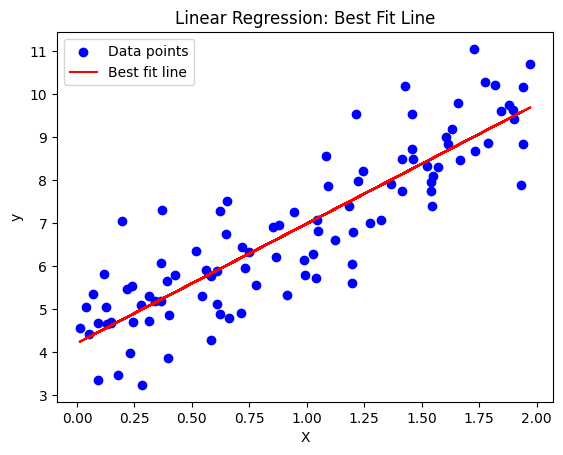

In [6]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X_b.dot(optimal_theta), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Best Fit Line')
plt.legend()
plt.show()